### 1.DataFrame - 컬럼명 변경 및 추가

In [85]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as plt

In [2]:
data1 = {
    'name':['James', 'Peter', 'Robert', 'Tom'],
    'address':['NY', 'NY', 'LA', 'Texas'],
    'age':[33,44,55,66]
}

df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [75]:
df2=DataFrame(np.random.randint(10,100,16).reshape(4,4),
             index=list('ABCD'),
             columns=list('ABCD'))
df2.columns = ['one', 'two', 'three', 'four']
df2

,one,two,three,four
A,10,84,30,58
B,22,88,31,46
C,42,23,26,17
D,78,25,34,21


In [5]:
# 1. 컬럼명 변경
'''
1) 전체 컬럼을 수정 - columns ---> inplace = True, 원본이 바뀐다
2) 부분 컬럼을 수정 - rename ---> inplace = False
'''
df2.columns = ['A-class', 'B-class', 'C-class', 'D-class']
df2

,A-class,B-class,C-class,D-class
A,21,23,56,56
B,26,54,65,86
C,36,24,85,56
D,25,84,70,72


In [9]:
'''
inplace=False
의 의미는 원본이 바뀌지 않음을 의미한다.
원본을 바꿀려면 반드시 inplace=True로 지정해서 사용해야 한다.

혹은 
다른 변수에 새롭게 할당하고 새로운 변수를 출력해야 한다.
'''

df1.rename(columns={'address':'addr'}, inplace=True)
df1_1 = df1.rename(columns={'address':'addr'})
df1_1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


### 2. DataFrame = 조회하기

In [21]:
df2.columns = ['one', 'two', 'three', 'four']
df2

#1. 행을 검색하는 슬라이싱 방법( 1. 숫자 인덱스 2. 라벨 인덱스)
df2[0:2] #인덱스..숫자.. 마지막 숫자는 포함 안함
df2['A':'B'] #인덱스..라벨.. 마지막 라벨은 포함

df2['one':'three'] #슬라이싱.. 행을 조회하는 방법.. 행 부분에 저런 라벨이 없기 때문에 출력되는 것이 없다


,one,two,three,four


In [40]:
df2

,one,two,three,four
A,21,23,56,56
B,26,54,65,86
C,36,24,85,56
D,25,84,70,72


In [47]:
#2. 컬럼 조회는 행을 조회하는 방법과는 다른 방법을 사용한다.
# df2['one', 'three'] - 이건 1차원 배열을 검색하는 방법이기에 안됨

df2[['one', 'three']]
print(df2[df2['two']>45])

# two 컬럼에서 45보다 큰값들만 출력하세요.. 숙제... loc, iloc, at, lat를 사용
print(df2[df2[['two']]>45])
print('*'*30)
print(df2[df2['two']>45]['two'])
print('*'*30)
df2[df2.iloc[:, 1:2]>45]['two']

d = df2[df2.iloc[:, 1:2]>45]
d

   one  two  three  four
B   26   54     65    86
D   25   84     70    72
   one   two  three  four
A  NaN   NaN    NaN   NaN
B  NaN  54.0    NaN   NaN
C  NaN   NaN    NaN   NaN
D  NaN  84.0    NaN   NaN
******************************
B    54
D    84
Name: two, dtype: int32
******************************


,one,two,three,four
A,NaN,NaN,NaN,NaN
B,NaN,54.0,NaN,NaN
C,NaN,NaN,NaN,NaN
D,NaN,84.0,NaN,NaN


### 3. iloc, loc | iat, at 조회하기
--- iloc, loc는 스칼라값 가져오는 용도가 아니다.
--- iat, at은 스칼라 값(단일 값)을 조회하는 기능이다.

In [29]:
# iloc : i는 index를 의미한다. 그래서 마지막 숫자는 포함하지 않는다
print(df1.iloc[0:2, 0:3])
print('*'*30)
print(df1.iloc[:2, :3])
print('*'*30)
print(df1.iloc[0:2])
print('*'*30)
print(df1.iloc[:2])

    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44
******************************
    name address  age
0  James      NY   33
1  Peter      NY   44


In [31]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [33]:
#loc를 살펴보자.. loc는 라벨로 인식하기 때문에 마지막 숫자 혹은 문자를 포함한다
print(df1.loc[0:1])
print(df1.loc[0:1, 'name':'address'])

    name address  age
0  James      NY   33
1  Peter      NY   44
    name address
0  James      NY
1  Peter      NY


In [39]:
# 스칼라값 가져오기...iat, at
# Rober의 나이 55를 검색
print(df1.at[2,'age'])

#Tom의 주소를 검색.. Texas...at
print(df1.at[3, 'address'])

#iat... Peter의 주소... Ny를 검색
print(df1.iat[1, 1])
#Rober의 나이 55를 검색
print(df1.iat[2, 2])

55
Texas
NY
55


#### 4. 누락데이타 삭제하기 --- dropna()

In [50]:
#phone 컬럼 추가
df1['phone'] = np.nan
df1

df1.loc[4] = np.nan
df1

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN
4,NaN,NaN,NaN,NaN


In [51]:
# 데이타 삭제하기... drop() 함수
df1.drop(4) # 4행 라벨.. 삭제

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN


In [52]:
df1 #원본 삭제 안된다. inplace 옵션 줘야 한다..drop() 함수

,name,address,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN
4,NaN,NaN,NaN,NaN


In [53]:
# drop 함수를 이용해서 phone 칼럼을 삭제.. inplace=True.. 원본 삭제
df1.drop('phone', axis=1, inplace=True)

In [54]:
df1

,name,address,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Robert,LA,55.0
3,Tom,Texas,66.0
4,NaN,NaN,NaN


In [55]:
df1.drop(4, inplace=True)

In [56]:
df1

,name,address,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Robert,LA,55.0
3,Tom,Texas,66.0


#### 5. 누락데이타 삭제하기 - dropna()

In [ ]:
'''
판다스에서는 누락데이터를 모두 NaN으로 처리한다.
통계함수는 누락데이타를 배제하고 연산한다.
dropna() - nan값이 하나라도 있는 모든 행을 삭제
dropna(how='all') - 모든 값이 NaN인 행만 삭제
dropna(how='any') - 하나라도 NaN이라면 그 행을 삭제, 디폴트
dropna(thresh=3) - NaN이 2개...있으면 삭제한다.
--------------------------------------------------
fillna() - NaN데이타를 다른 값으로 채우는 함수
--------------------------------------------------
isnull()
notnull()


'''

In [58]:
from numpy import nan as NA
df = DataFrame([[1, 6.5, 3], [1, NA, NA], [NA, NA, NA], [NA, 6.5, 3]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [60]:
removeNa=df.dropna()
removeNa

,0,1,2
0,1.0,6.5,3.0


In [71]:
df.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [72]:
df.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


In [73]:
df.fillna(0) #0으로 채운다

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [66]:
df.fillna(df.mean())

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [67]:
df.fillna(value=5)

,0,1,2
0,1.0,6.5,3.0
1,1.0,5.0,5.0
2,5.0,5.0,5.0
3,5.0,6.5,3.0


In [69]:
df.fillna(method='ffill')

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


#### 6. DataFrame = 정렬하기 :: sort_index()|sort_values()

In [76]:
df2

,one,two,three,four
A,10,84,30,58
B,22,88,31,46
C,42,23,26,17
D,78,25,34,21


In [81]:
#shott + Tab : ?의 단축키, ascending : 오름차순
df2.sort_index(axis=1, ascending=False)
df2.sort_values(by=['four'])

,one,two,three,four
C,42,23,26,17
D,78,25,34,21
B,22,88,31,46
A,10,84,30,58


실전 데이타로 응용

In [82]:
df3 = pd.read_csv('../data/tips.csv')
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [83]:
# 문제 1. tip이라는 컬럼으로 정렬.. 내림차순정렬.. 샘플데이타 5개만 출력

df3.sort_values(by=['tip'], ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


<AxesSubplot:>

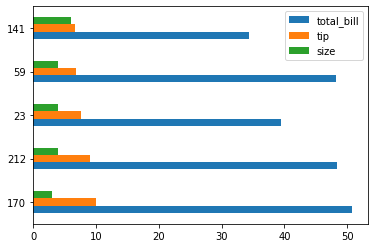

In [87]:
#위의 정렬된 결과를 시각화 해서...
df3.sort_values(by=['tip'], ascending=False).head().plot(kind='barh')

In [88]:
#문제 2. day, tip 컬럼을 차례로 정렬
#day는 내림차순 정렬, tip은 오름차순
#마지막 데이터 7줄만 출력
df3.sort_values(by=['day', 'tip'], ascending=[False, True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


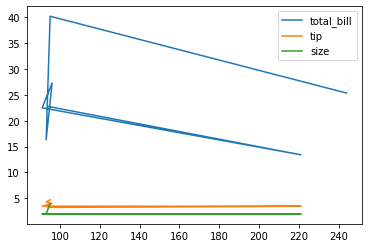

In [90]:
import matplotlib.pyplot as plt
df3.sort_values(by=['day', 'tip'], ascending=[False, True]).tail(7).plot()
plt.show()

In [91]:
# 문제 3.. DISTINCT와 같은 기능의 함수. unique()
df3['day'].uniquee()

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [94]:
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64